In [1]:
import pandas as pd
import ast
import functions.cluster as cluster
import importlib
import json

importlib.reload(cluster)

<module 'functions.cluster' from '/Users/chayapatr/Papers/uist-25/functions/cluster.py'>

In [2]:
# def filter_member(x):
#     m = ast.literal_eval(x)
#     # return every

merged_keys = pd.read_csv('data/graph/merged_keys.csv')
# merged_members = merged_keys['members'].apply(lambda x: filter_member(x)).tolist()
# merged_members = [ item for sublist in merged_members for item in sublist]
merged_members = []

for i, row in merged_keys.iterrows():
    m = ast.literal_eval(row['members'])
    merged_members += [item for item in m if item != row['representative']]

embeddings = pd.read_csv('data/embeddings/all.csv')
embeddings['embedding'] = embeddings['embedding'].apply(lambda x: ast.literal_eval(x))
embeddings = embeddings[~embeddings['key'].isin(['human', 'ai', 'co'])]
embeddings = embeddings[~embeddings['key'].isin(merged_members)]

feature = embeddings[embeddings['key'].apply(lambda x: len(x.split(">")) != 1)]
feature = feature.drop(columns=['embedding'])
feature['type'] = feature['key'].apply(lambda x: x.split(">")[0])
feature['cluster'] = feature['type']

embeddings = embeddings[embeddings['key'].apply(lambda x: len(x.split(">")) == 1)]

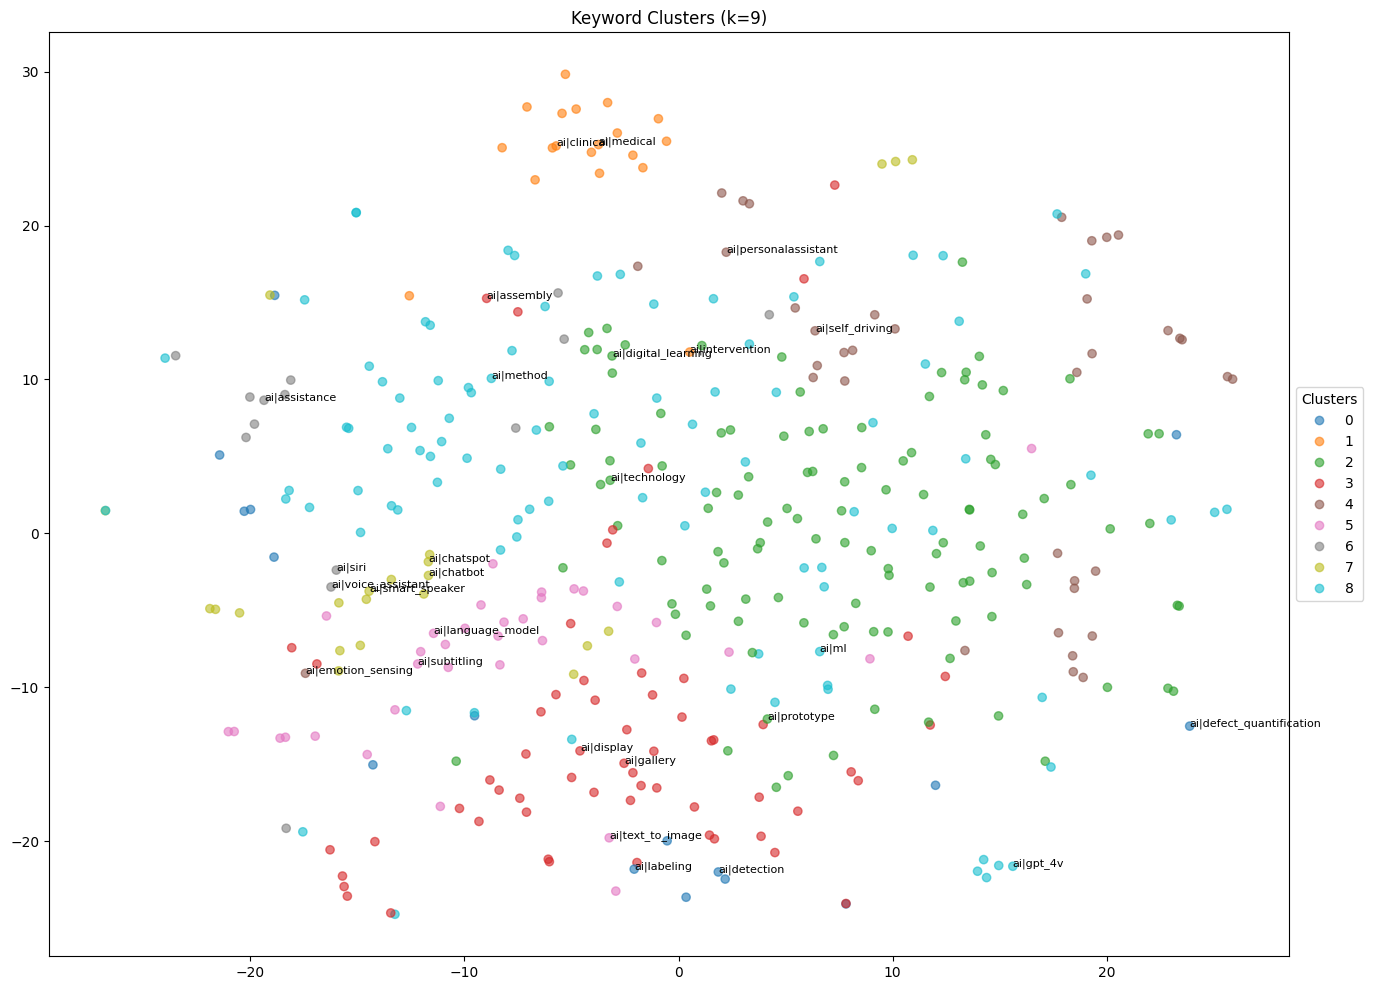


Top 15 representatives for each cluster:

Cluster 0:
- ai|detection
- ai|keyword_spotting
- ai|segmentation
- ai|recommendation
- ai|screening
- ai|classifier
- ai|labeling
- ai|auto_suggest
- ai|fashion_recommender
- ai|personalization
- ai|nearest_neighbor
- ai|audience_selection
- ai|recruitment
- ai|sales_forecasting
- ai|bird_identification

Cluster 1:
- ai|medical
- ai|clinical
- ai|medpalm2
- ai|healthcare
- ai|diagnostic
- ai|med_palm2
- ai|mobile_health
- ai|clinical_decision_support
- ai|anatomysketch
- ai|intervention
- ai|symptomchecker
- ai|pathology
- ai|ultrasound
- ai|dermatologist
- ai|forensic

Cluster 2:
- ai|algorithmic
- ai|vision_language
- ai|flan_palm
- ai|neural_network
- ai|semantic
- ai|technology
- ai|gamchanger
- ai|deeplearning
- ai|softaibot
- ai|metaphorical
- ai|heuristics
- ai|memory_one
- ai|contextdet
- ai|disentanglement
- ai|unsupervised

Cluster 3:
- ai|visual
- ai|image
- ai|video
- ai|visual_search
- ai|artinter
- ai|interactive
- ai|interface


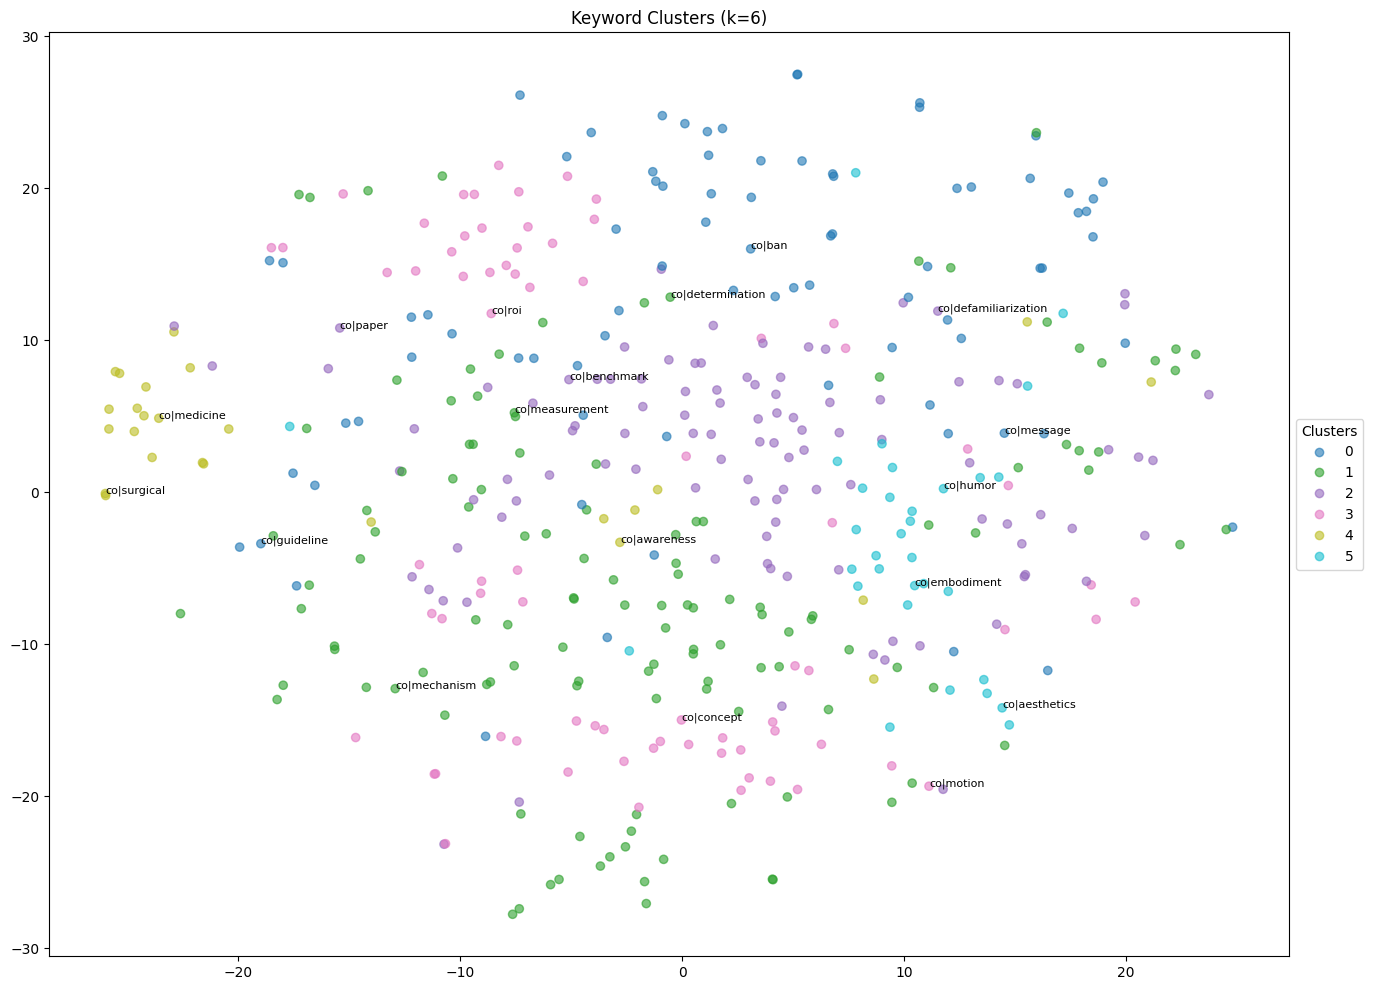


Top 15 representatives for each cluster:

Cluster 0:
- co|issue
- co|support
- co|policy
- co|legal
- co|application
- co|representation
- co|transparency
- co|industry
- co|regulation
- co|authority
- co|quality
- co|aqi
- co|signal
- co|decision
- co|access

Cluster 1:
- co|code_sample
- co|explanation_design
- co|knowledge
- co|explanation
- co|test
- co|image_classification
- co|assignment
- co|toolkit
- co|solution
- co|expression
- co|reasoning
- co|annotation
- co|context
- co|answer
- co|tutorial

Cluster 2:
- co|publication
- co|content
- co|narrative_map
- co|display
- co|news
- co|feature
- co|resource
- co|text
- co|media
- co|trust_scale
- co|analysis
- co|image
- co|scale
- co|human
- co|information

Cluster 3:
- co|collaboration
- co|partner
- co|company
- co|innovation
- co|presentation
- co|consulting
- co|interface
- co|strategy
- co|design_ideation
- co|digital_transformation
- co|interaction
- co|startup
- co|organizational
- co|creativity
- co|transformation

Clus

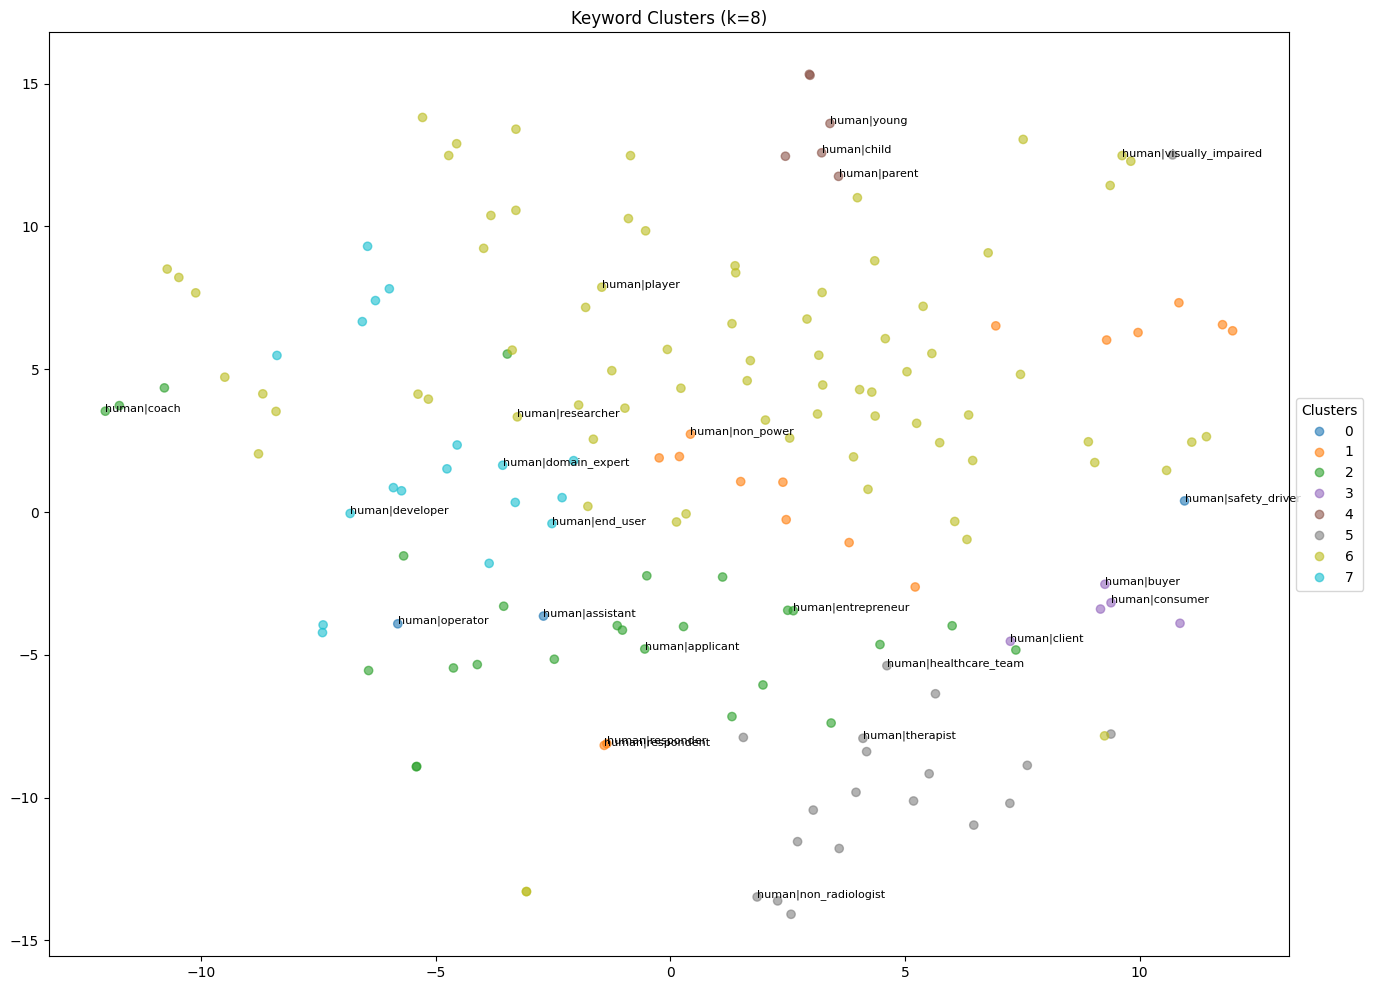


Top 15 representatives for each cluster:

Cluster 0:
- human|operator
- human|assistant
- human|safety_driver

Cluster 1:
- human|decision_subject
- human|non_expert
- human|nonexpert
- human|evaluator
- human|defender
- human|judge
- human|responder
- human|legal
- human|respondent
- human|non_power
- human|public_defender
- human|decisionmaker
- human|agent
- human|judicial
- human|stakeholder

Cluster 2:
- human|jobapplicant
- human|professional
- human|employee
- human|high_performing
- human|enterprise
- human|expert
- human|recruiter
- human|practitioner
- human|leader
- human|team
- human|mentor
- human|civil_servant
- human|worker
- human|candidate
- human|partner

Cluster 3:
- human|customer
- human|consumer
- human|buyer
- human|client
- human|bank

Cluster 4:
- human|child
- human|young
- human|parent
- human|adolescent
- human|teenager
- human|preschooler

Cluster 5:
- human|clinician
- human|patient
- human|physician
- human|provider
- human|specialist
- human|healthcare_

In [3]:
embeddings['type'] = embeddings['key'].apply(lambda x: x.split("|")[0]).apply(lambda x: x.split(">")[0])

for t in embeddings['type'].unique():
    c, k, representatives = cluster.cluster_and_visualize(embeddings[embeddings['type'] == t])
    
    count = 0
    for i, row in embeddings[embeddings['type'] == t].iterrows():
        embeddings.at[i, 'cluster'] = f"{t}:{c[count]}"
        count += 1

In [4]:
embeddings.drop(columns=['embedding'], inplace=True)
pd.concat([embeddings, feature]).to_csv("data/graph/clustered_keys.csv", index=False)